<a href="https://colab.research.google.com/github/Jatinnagar777/demo/blob/main/Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#Datasets

In [111]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Data Visualization

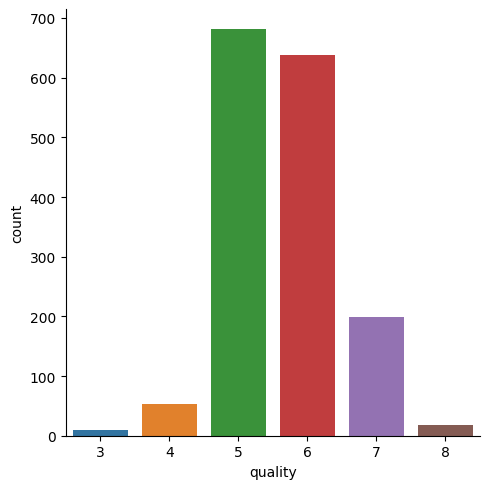

In [112]:
sns.catplot(x='quality', data=df, kind='count')

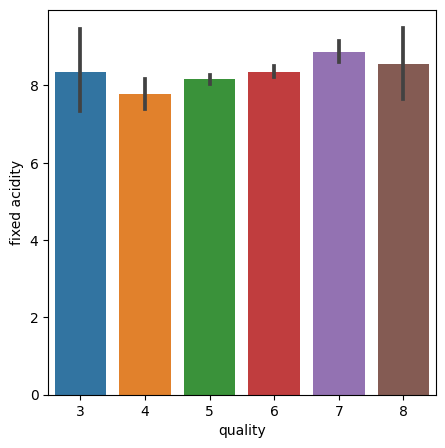

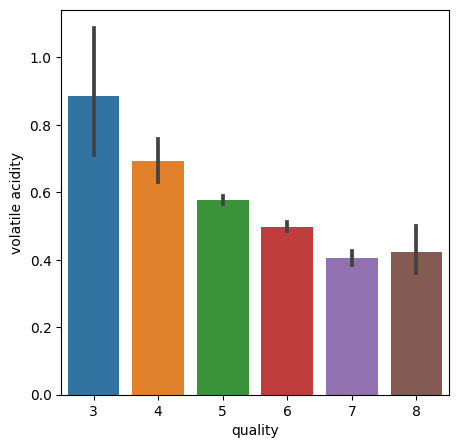

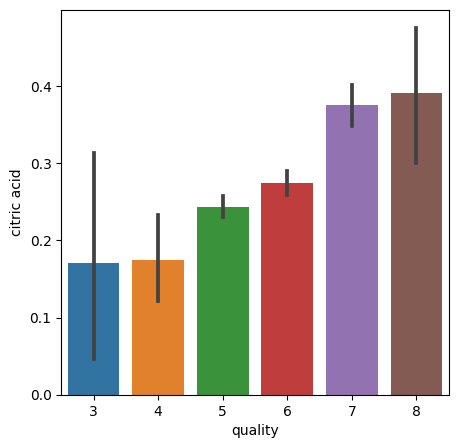

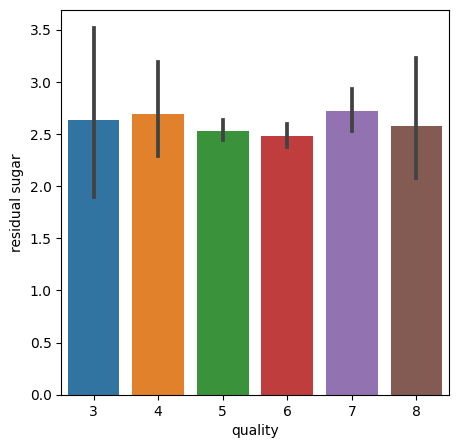

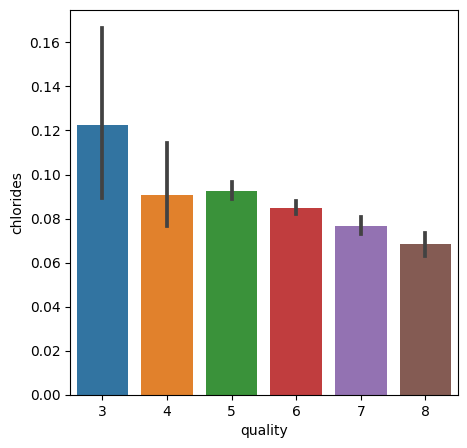

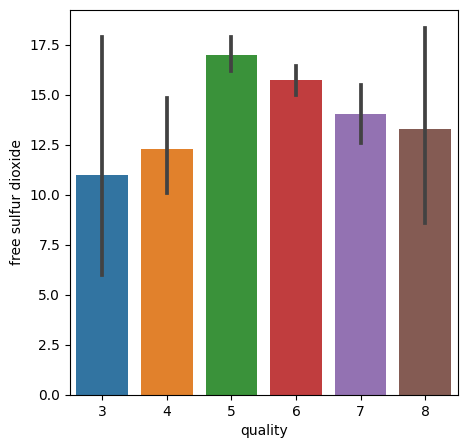

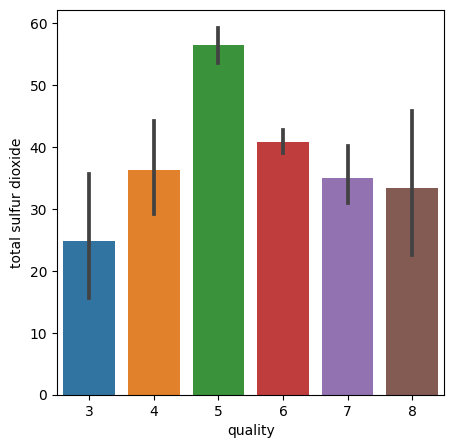

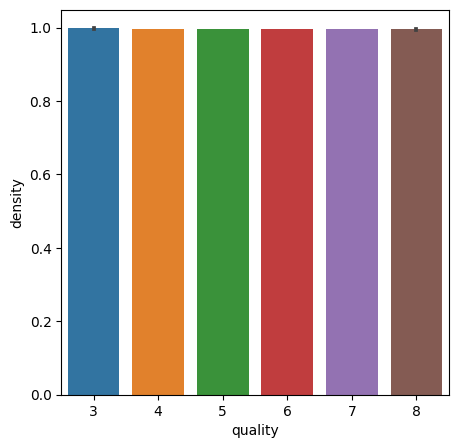

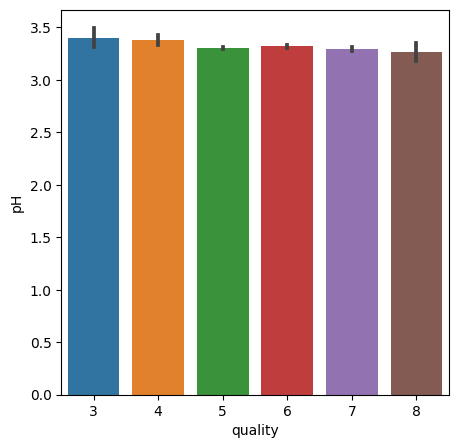

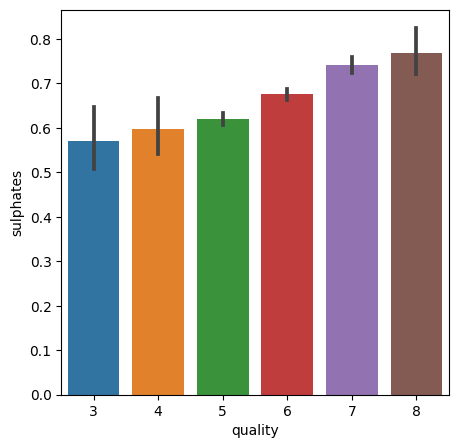

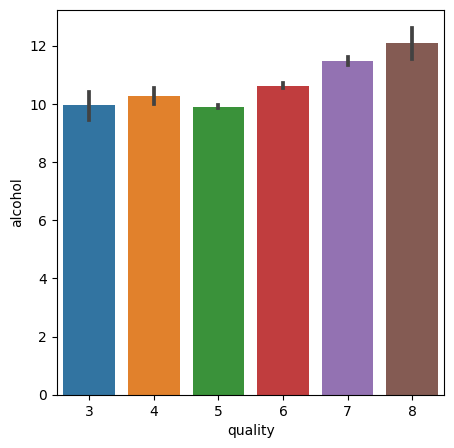

In [113]:
for column in df.columns[:-1]:
  plot = plt.figure(figsize=(5, 5))
  sns.barplot(x='quality', y=column, data=df)
  plt.show()

Correlation

<Axes: >

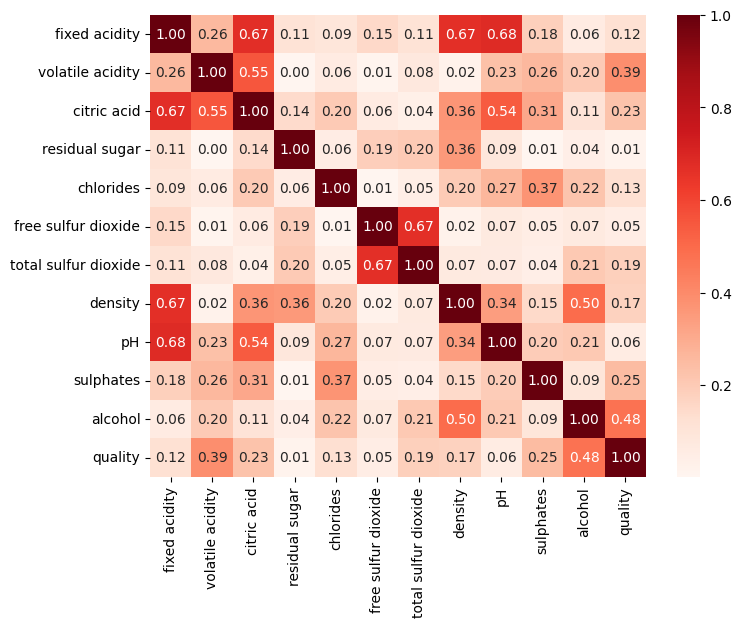

In [114]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr().abs(), annot=True, fmt='.2f', cmap='Reds')

Data preprocessing

In [115]:
x = df.drop('quality', axis=1)
y = df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [116]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [117]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [118]:
over = RandomOverSampler()
x, y = over.fit_resample(x, y)

#Train/Test Datasets

In [119]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4)
x_test, x_valid, y_test, y_valid = train_test_split(x_temp, y_temp, test_size=0.5)

#KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [121]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [122]:
y_pred = knn_model.predict(x_test)

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       274
           1       0.86      0.98      0.92       279

    accuracy                           0.91       553
   macro avg       0.92      0.91      0.91       553
weighted avg       0.92      0.91      0.91       553



#Naive Bayes

In [124]:
from sklearn.naive_bayes import GaussianNB

In [125]:
n_model = GaussianNB()
n_model.fit(x_train, y_train)

GaussianNB()

In [126]:
y_pred = n_model.predict(x_test)

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       274
           1       0.75      0.84      0.79       279

    accuracy                           0.77       553
   macro avg       0.78      0.77      0.77       553
weighted avg       0.78      0.77      0.77       553



#SVM

In [128]:
from sklearn.svm import SVC

In [129]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [130]:
y_pred = svm_model.predict(x_test)

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       274
           1       0.83      0.89      0.86       279

    accuracy                           0.85       553
   macro avg       0.85      0.85      0.85       553
weighted avg       0.85      0.85      0.85       553



#Logsitic

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [134]:
y_pred = log_model.predict(x_test)

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       274
           1       0.80      0.85      0.83       279

    accuracy                           0.82       553
   macro avg       0.82      0.82      0.82       553
weighted avg       0.82      0.82      0.82       553



#Neural Network

In [136]:
import tensorflow as tf

In [137]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

In [138]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
  history = nn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid), verbose=0)
  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch_size 16


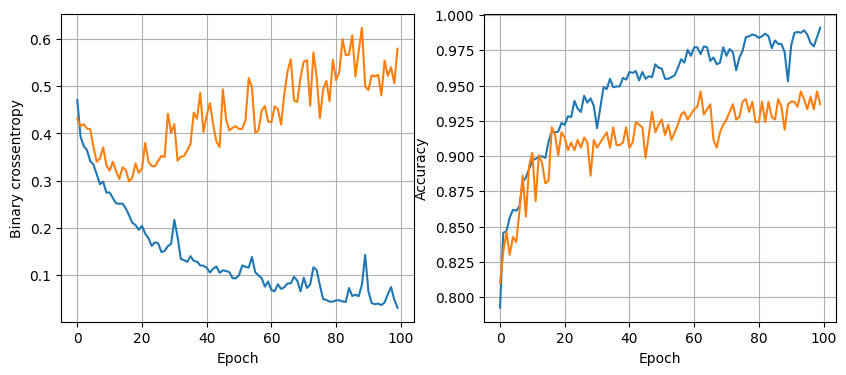

18/18 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.9367
16 nodes, dropout 0, lr 0.01, batch_size 32


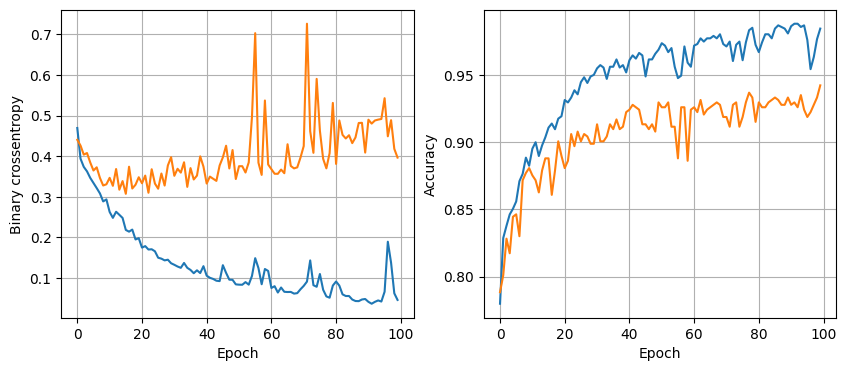

18/18 [==============================] - 0s 3ms/step - loss: 0.3965 - accuracy: 0.9421
16 nodes, dropout 0, lr 0.001, batch_size 16


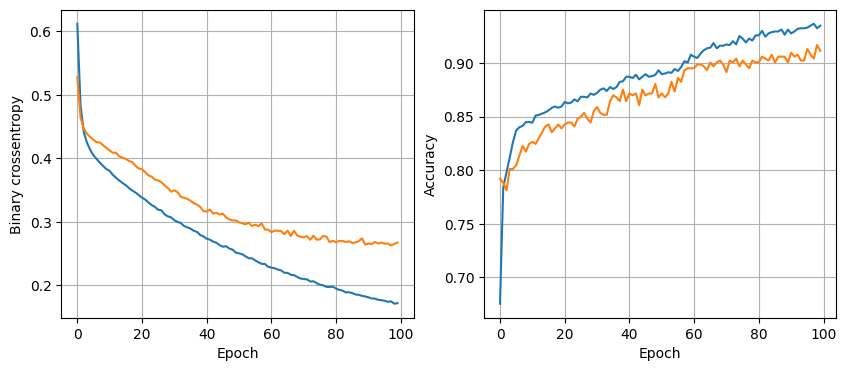

18/18 [==============================] - 0s 2ms/step - loss: 0.2674 - accuracy: 0.9114
16 nodes, dropout 0, lr 0.001, batch_size 32


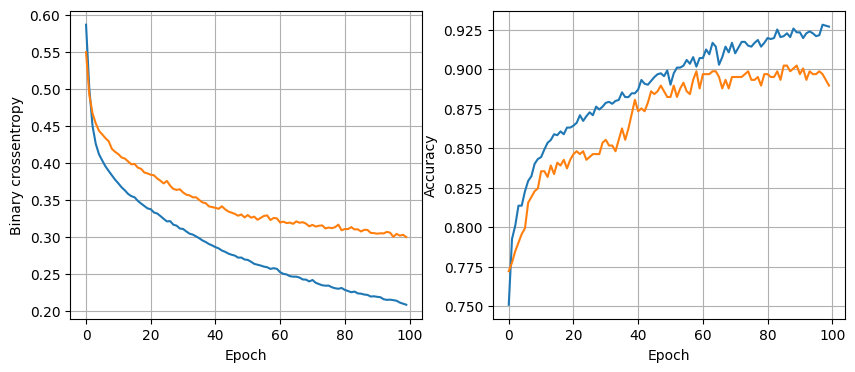

18/18 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.8897
16 nodes, dropout 0.2, lr 0.01, batch_size 16


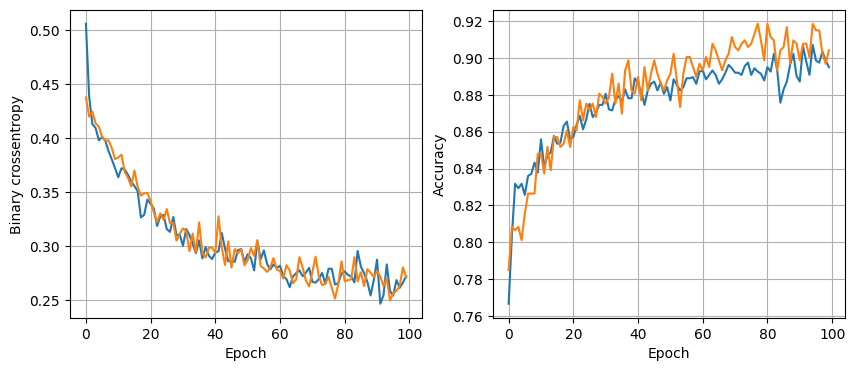

18/18 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.9042
16 nodes, dropout 0.2, lr 0.01, batch_size 32


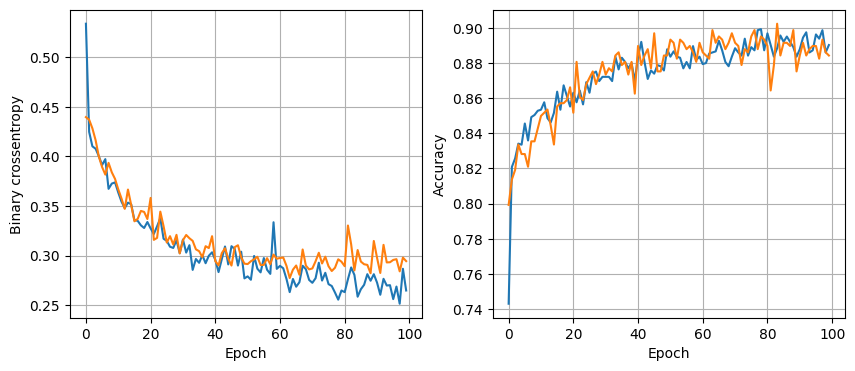

18/18 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.8843
16 nodes, dropout 0.2, lr 0.001, batch_size 16


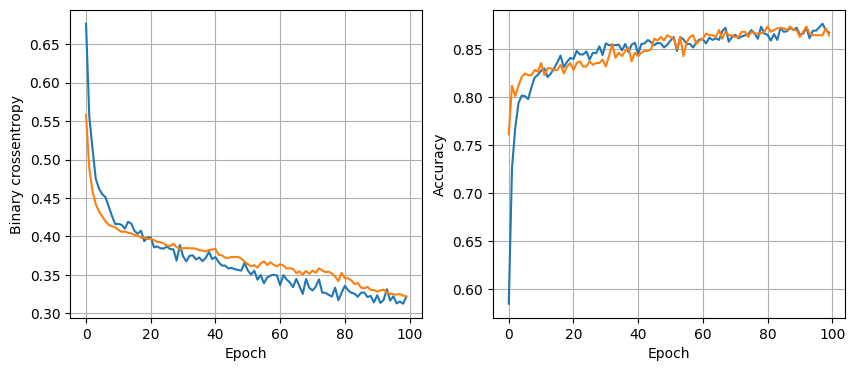

18/18 [==============================] - 0s 3ms/step - loss: 0.3222 - accuracy: 0.8644
16 nodes, dropout 0.2, lr 0.001, batch_size 32


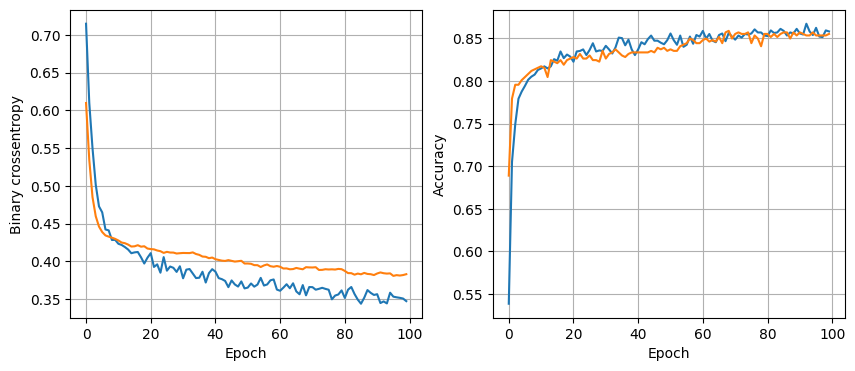

18/18 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8553
32 nodes, dropout 0, lr 0.01, batch_size 16


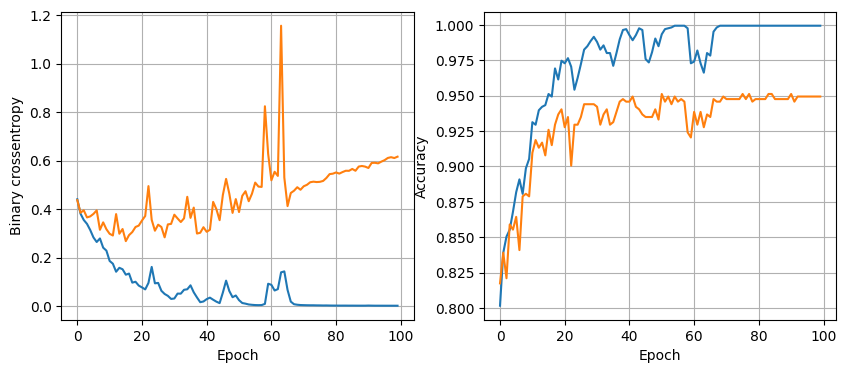

18/18 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.9494
32 nodes, dropout 0, lr 0.01, batch_size 32


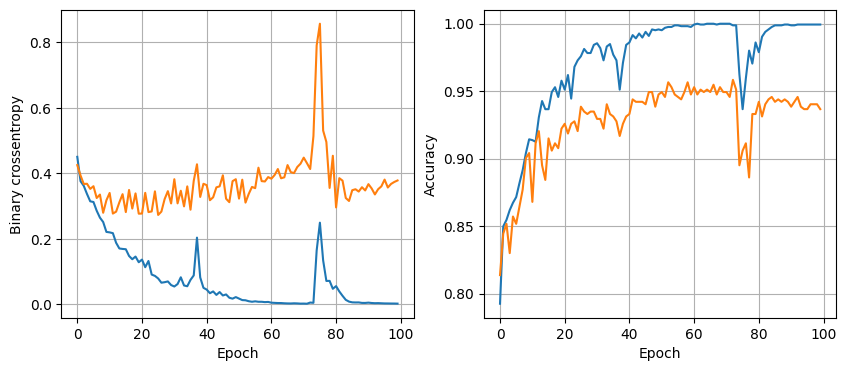

18/18 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.9367
32 nodes, dropout 0, lr 0.001, batch_size 16


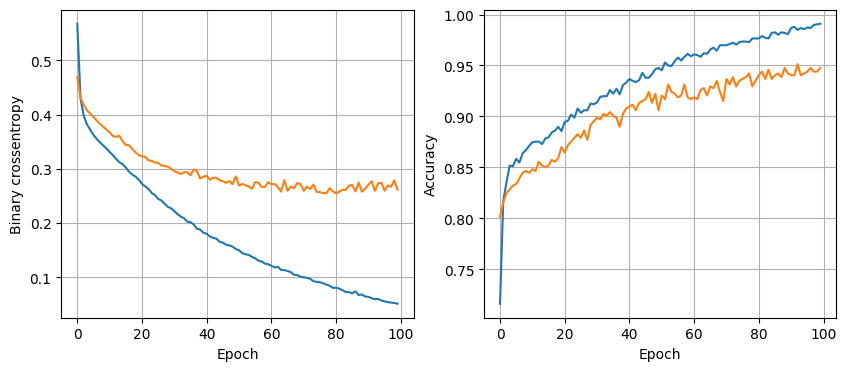

18/18 [==============================] - 0s 2ms/step - loss: 0.2616 - accuracy: 0.9476
32 nodes, dropout 0, lr 0.001, batch_size 32


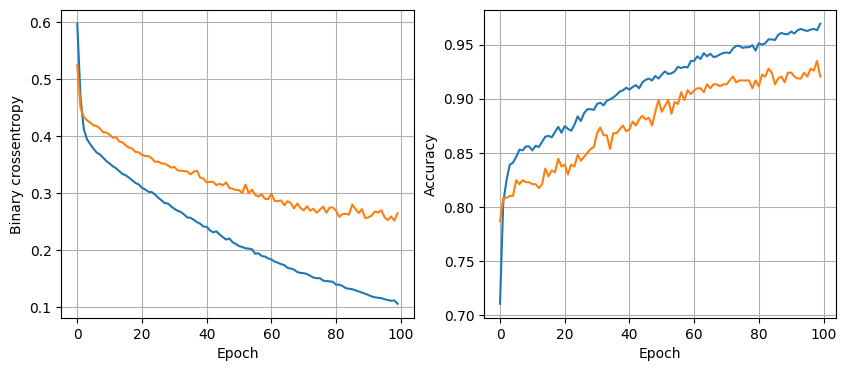

18/18 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.9204
32 nodes, dropout 0.2, lr 0.01, batch_size 16


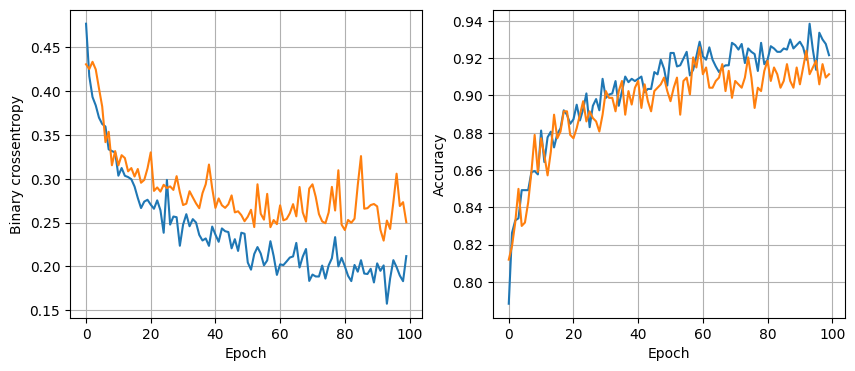

18/18 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.9114
32 nodes, dropout 0.2, lr 0.01, batch_size 32


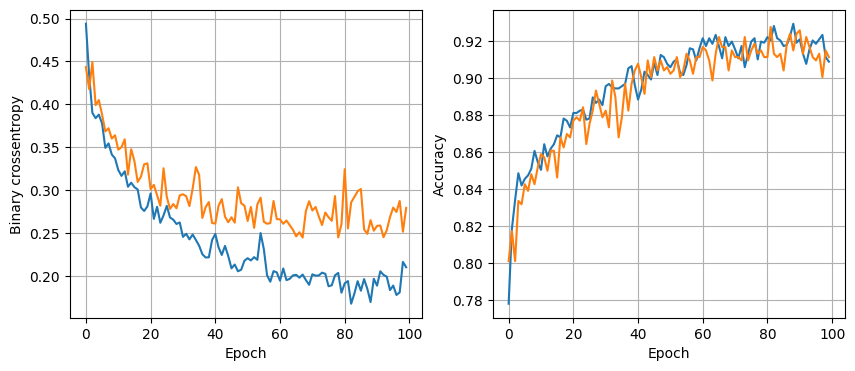

18/18 [==============================] - 0s 3ms/step - loss: 0.2794 - accuracy: 0.9114
32 nodes, dropout 0.2, lr 0.001, batch_size 16


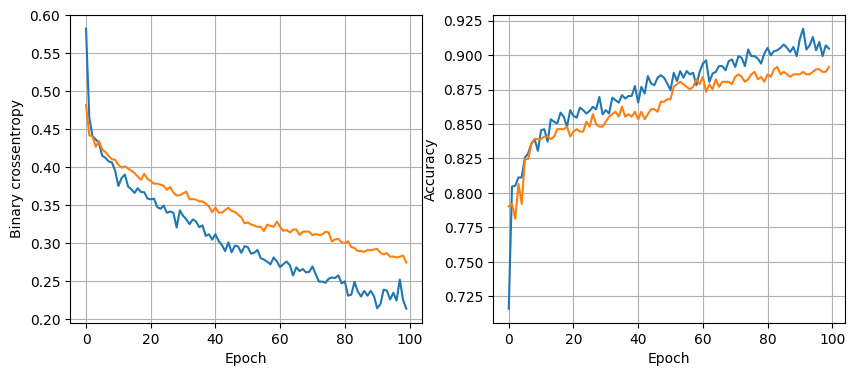

18/18 [==============================] - 0s 2ms/step - loss: 0.2747 - accuracy: 0.8915
32 nodes, dropout 0.2, lr 0.001, batch_size 32


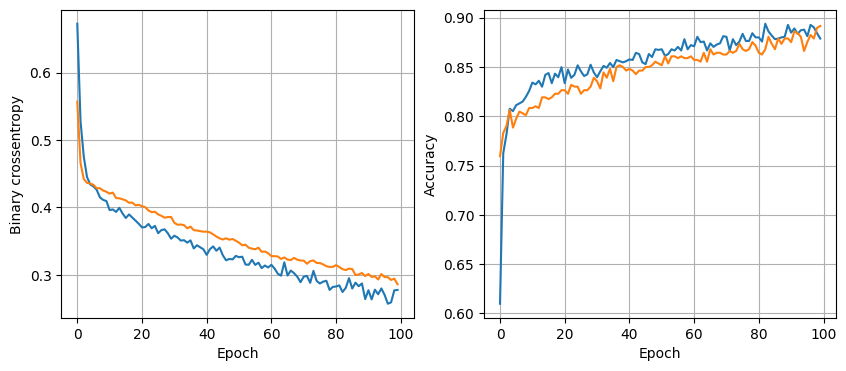

18/18 [==============================] - 0s 3ms/step - loss: 0.2860 - accuracy: 0.8915
64 nodes, dropout 0, lr 0.01, batch_size 16


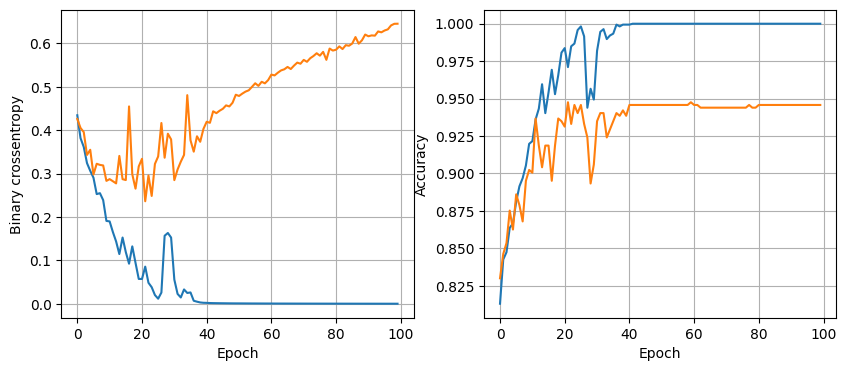

18/18 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.9458
64 nodes, dropout 0, lr 0.01, batch_size 32


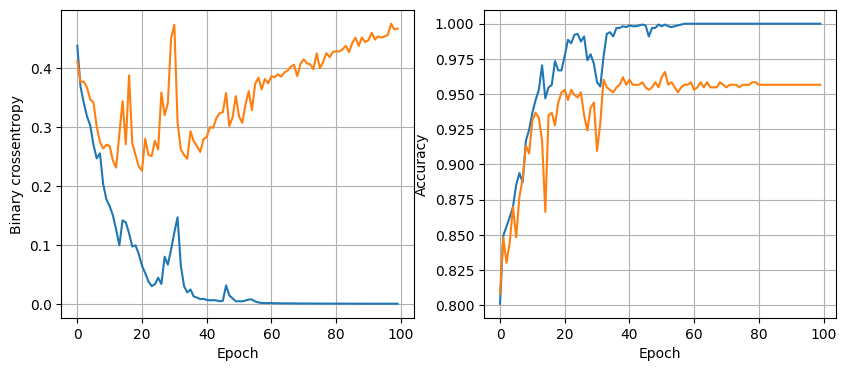

18/18 [==============================] - 0s 4ms/step - loss: 0.4676 - accuracy: 0.9566
64 nodes, dropout 0, lr 0.001, batch_size 16


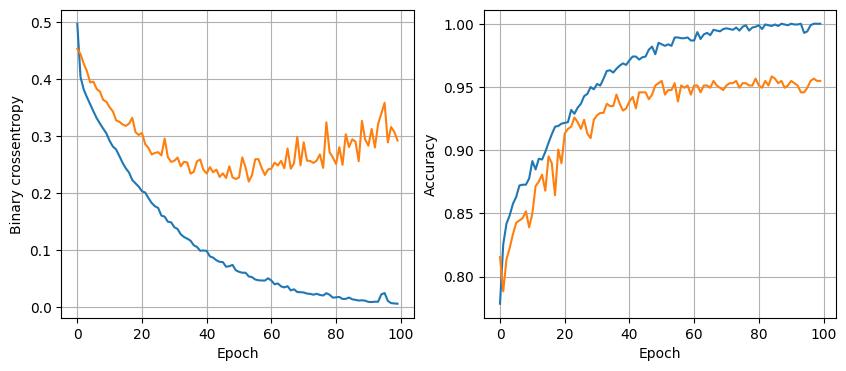

18/18 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.9548
64 nodes, dropout 0, lr 0.001, batch_size 32


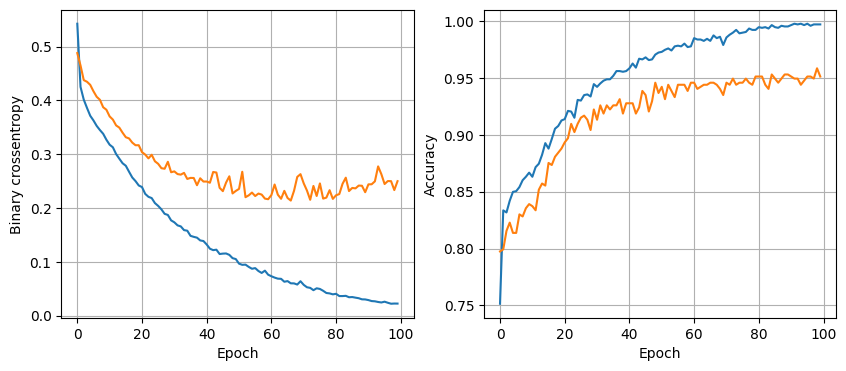

18/18 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.9512
64 nodes, dropout 0.2, lr 0.01, batch_size 16


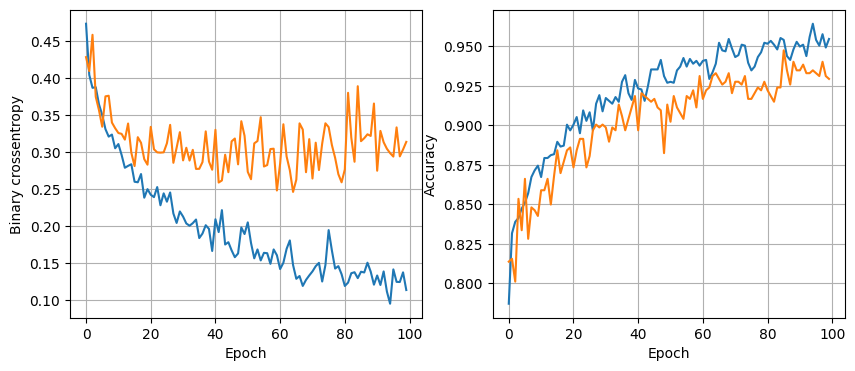

18/18 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.9295
64 nodes, dropout 0.2, lr 0.01, batch_size 32


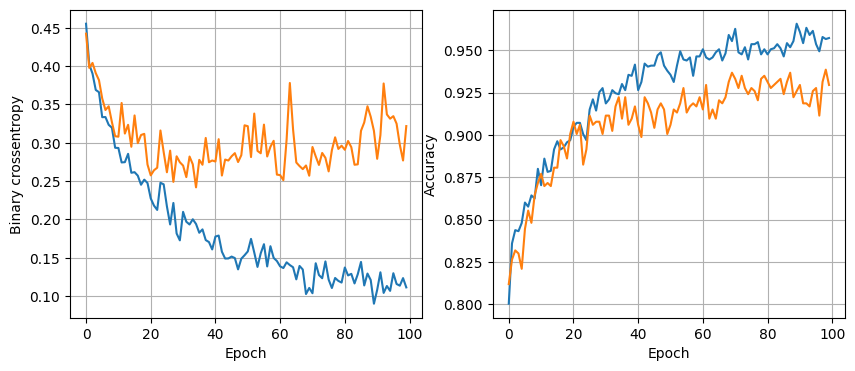

18/18 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.9295
64 nodes, dropout 0.2, lr 0.001, batch_size 16


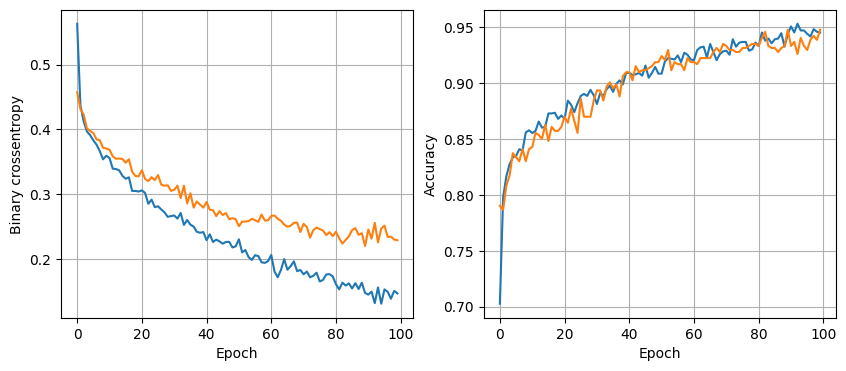

18/18 [==============================] - 0s 3ms/step - loss: 0.2291 - accuracy: 0.9476
64 nodes, dropout 0.2, lr 0.001, batch_size 32


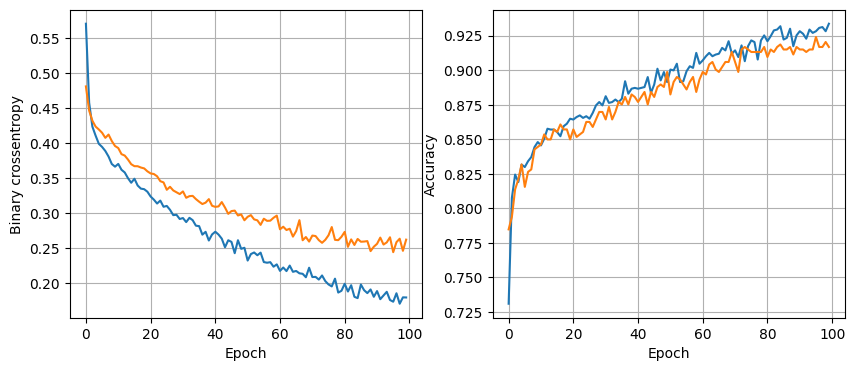

18/18 [==============================] - 0s 3ms/step - loss: 0.2623 - accuracy: 0.9168


In [139]:
max_accuracy = 0
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.001]:
      for batch_size in [16, 32]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_accuracy = model.evaluate(x_valid, y_valid)[1]
        if val_accuracy > max_accuracy:
          max_accuracy = val_accuracy
          least_loss_model = model

In [140]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)

18/18 [==============================] - 0s 2ms/step


In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       274
           1       0.94      1.00      0.97       279

    accuracy                           0.96       553
   macro avg       0.97      0.96      0.96       553
weighted avg       0.97      0.96      0.96       553

